# Wyznaczanie wspłóczynnika przewodnictwa ciepła
## czarna pianka

Poniżej znajdują się dane uzyskane w wyniku eksperymentu. Kolejne temperatury podczas chłodzenia mierzone co 30 sekund.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
temp_cooling = [64.0,63.4,62.7,62.0,61.3,60.6,60.1,59.5,58.8,58.2,57.6,57.0,56.3,56.0,55.4,55.0,54.6,54.1,53.7,53.2,52.7,52.3,51.8,51.4,50.9]
temp_eq_heater = [88.7, 88.8, 88.6, 88.6, 88.7, 88.8]
temp_eq_plate = [53.5, 53.7, 54.0, 54.2, 54.4, 54.5]

material_diameter = [98.58, 98.2, 98.3, 98.42, 97.9, 98.36, 98.16, 97.96, 98.08, 97.62]
material_height = [3.02, 3.10, 3.02, 3.02, 3.04, 3.0, 3.02, 3.08, 3.1, 3.0]

Policzymy z jaką dokładnością wyznaczono punkt równowagi temperaturowej układu

In [3]:
np.mean(temp_eq_heater), np.std(temp_eq_heater)

(88.7, 0.08164965809277376)

In [4]:
np.mean(temp_eq_plate), np.std(temp_eq_plate)

(54.04999999999999, 0.35939764421412995)

Uśredniamy wyniki pomiarów rozmiaru badanego materiału. Był mierzony suwmiarką o dokładności  0.02mm.
Ponieważ wykonano serię 10 pomiarów dla każdego z wymiarów, to do określenia niepewności zastosujemy odchylenie standardowe. Materiał nie był w pełni okrągły, więc niepewność będzie stanowczo większa.

In [5]:
np.mean(material_diameter), np.std(material_diameter)

(98.158, 0.2666008252050232)

In [6]:
np.mean(material_height), np.std(material_height)

(3.04, 0.03687817782917158)

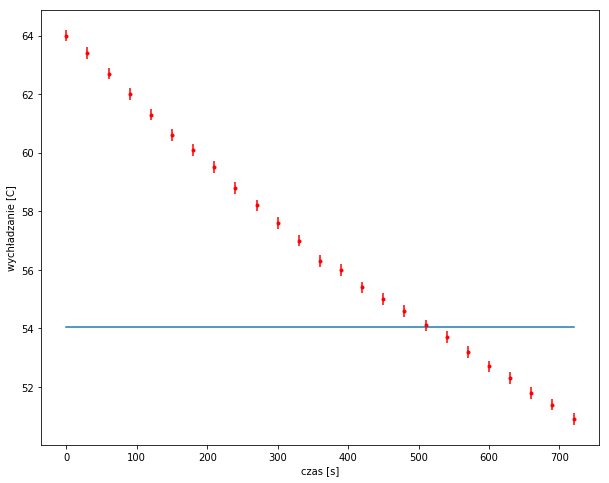

In [18]:
t = np.array([30*x for x in range(len(temp_cooling))])

plt.errorbar(t, temp_cooling, yerr=0.2, fmt='r.')
plt.plot([0,t[-1]], [np.mean(temp_eq_plate)]*2)

plt.ylabel('wychładzanie [C]')
plt.xlabel('czas [s]')
plt.show()

Znajdujemy wartość najbliższą punktowi równowagi, następnie dokonujemy regresji liniowej na punktach w sąsiedztwie dwóch pomiarów. (regresja liniowa z 5 punktów, yay!)

In [8]:
i = (np.abs(temp_cooling - np.mean(temp_eq_plate))).argmin()
n = 2 # neigbourhood

m, b = np.polyfit(t[i-n:i+n+1], temp_cooling[i-n:i+n+1], 1)
print('y = {:.6f}t + {:.6f}'.format(m, b))

y = -0.015000t + 61.770000


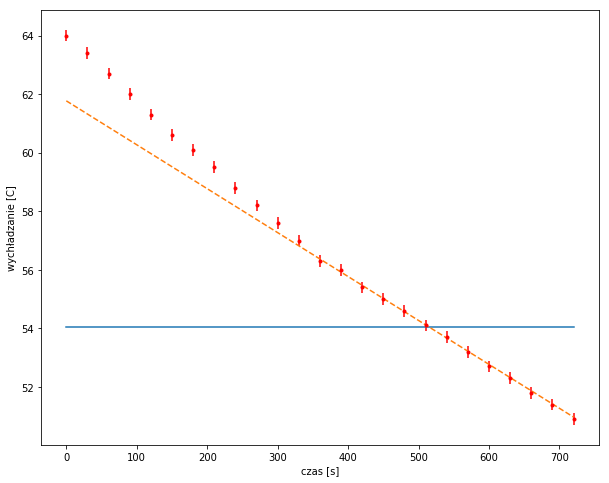

In [19]:
plt.errorbar(t, temp_cooling, yerr=0.2, fmt='r.')
plt.plot([0,t[-1]], [np.mean(temp_eq_plate)]*2)

plt.plot(t, m*t + b, '--')

plt.ylabel('wychładzanie [C]')
plt.xlabel('czas [s]')
plt.show()

### Liczenie współczynnika
$$K = \frac{M C_w d}{ \pi r^2(T_{2R}-T_{1R})} (\frac{\partial T_1}{\partial t}) $$

In [34]:
M = 0.611 # kg
C_w = 400 # J/(kg*K)
r = np.mean(material_diameter)/2 * 0.001 # m
d = np.mean(material_height) * 0.001 # m
diffT = np.mean(temp_eq_heater) - np.mean(temp_eq_plate) # T2 - T1
# m = dT_1/dt

K = ((M * C_w * d)/(np.pi * r**2 *diffT))*m
print('{:.10f}'.format(K))

-0.0425031896
